In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

## 1)Dataset
We use the clean_TAIPEI_diabetes.csv dataset – a cleaned version of the original dataset where all missing values and outliers (e.g., 0s in BMI, PlasmaGlucose, etc.) have been treated or removed.

## 2)Features:
Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age

## 3)Target Variable:
Diabetic:
1 = diabetic
0 = not diabetic

In [3]:
df = pd.read_csv("clean_TAIPEI_diabetes.csv")

In [4]:
X = df.drop(columns=["PatientID", "Diabetic"]) # All columns except the target
y = df["Diabetic"]                 # Target column

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

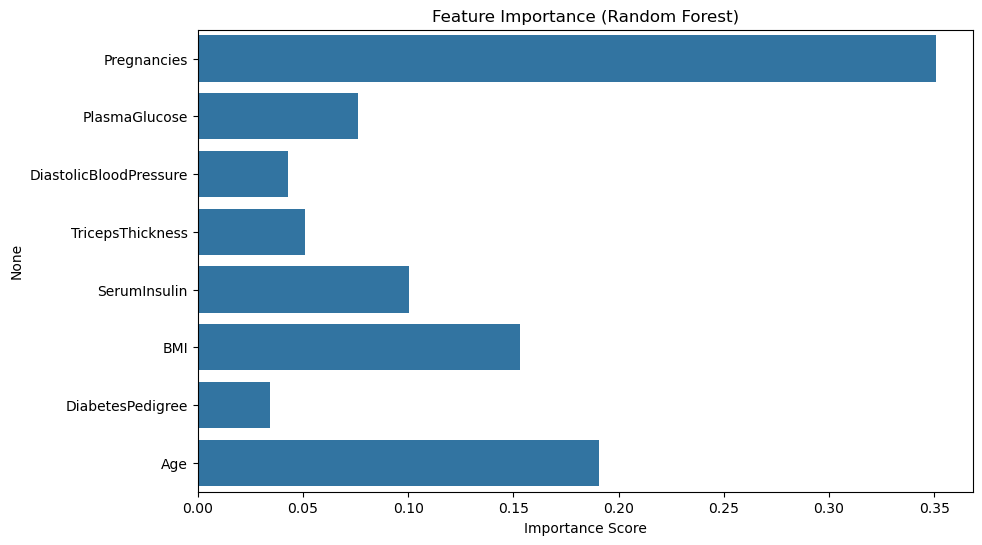

In [7]:
# Feature importance from Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_scaled, y)

importances = rfc.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

## Tools & Libraries Used
Library	Purpose

pandas	Load and explore data

numpy	Numeric operations

sklearn.model_selection	Data splitting

sklearn.preprocessing	Feature scaling

sklearn.ensemble	Random Forest model

sklearn.metrics	Model evaluation metrics


In [9]:
import pandas as pd
import numpy as np


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv("clean_TAIPEI_diabetes.csv")


## Train-Test Split
We use train_test_split from sklearn.model_selection to divide our dataset:

80% → Training Set
20% → Test Set
random_state=42 ensures the same split is used each time (reproducibility)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## Why Random Forest?
We use RandomForestClassifier from sklearn.ensemble. It's an ensemble method made up of many decision trees. It's ideal because:

Works with both linear and non-linear data Robust to outliers and missing data Doesn't require feature scaling Prevents overfitting using bagging Can measure feature importance

In [15]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
y_pred = rfc.predict(X_test)            # Binary predictions
y_proba = rfc.predict_proba(X_test)[:, 1]  # Probability of being diabetic (for ROC AUC)


## Evaluation Metrics
We use:

accuracy_score: Overall correctness

confusion_matrix: True/False Positives/Negatives

classification_report: Includes Precision, Recall, F1 Score

These are all from sklearn.metrics – a standard way to assess classifier performance.

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")


Accuracy: 95.08 %


In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[1497   43]
 [  60  495]]


In [20]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1540
           1       0.92      0.89      0.91       555

    accuracy                           0.95      2095
   macro avg       0.94      0.93      0.94      2095
weighted avg       0.95      0.95      0.95      2095



## Why Use ROC Curve?

The ROC curve helps us check if the model is good at separating people into diabetic and non-diabetic groups.

It shows us how the model balances:

### True Positive Rate (also called Recall):
This tells us how many people with diabetes the model correctly found.

### False Positive Rate:
This tells us, out of all the people who don't have diabetes, how many did the model wrongly say are diabetic?

This is useful because sometimes the dataset might not have an equal number of diabetic and non-diabetic people (called an imbalanced dataset). The ROC curve helps us check if the model still works well in s
The ROC curve helps us check if the model is good at separating people into diabetic and non-diabetic groups.

It shows if the model works well even when we change the decision boundary.

The bigger the area under the curve (AUC), the better the model.

Finally, we summarize this performance with a single number called AUC (Area Under the Curve):

If AUC = 1 → The model is perfect.

If AUC > 0.8 → The model is very good.

If AUC = 0.5 → The model is just guessing randomly.

In [22]:
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", round(roc_auc, 4))


ROC AUC Score: 0.9829


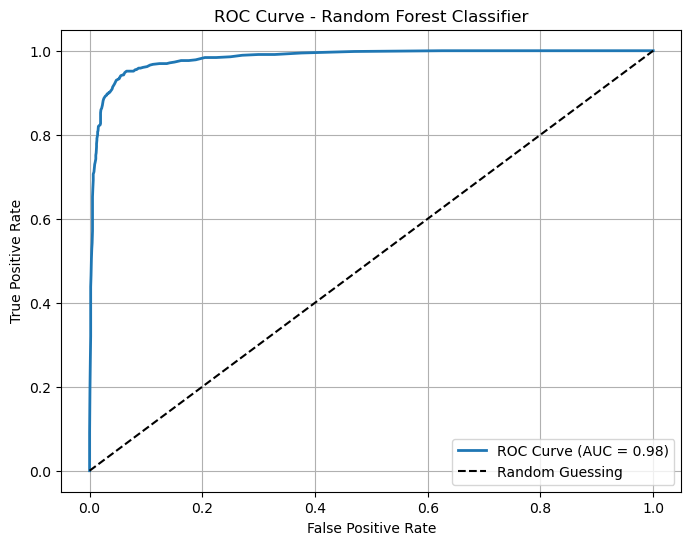

In [23]:
 ## the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
print("F1 Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.9508353221957041
Confusion Matrix:
 [[1497   43]
 [  60  495]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1540
           1       0.92      0.89      0.91       555

    accuracy                           0.95      2095
   macro avg       0.94      0.93      0.94      2095
weighted avg       0.95      0.95      0.95      2095

ROC AUC Score: 0.982942552942553
F1 Score: 0.982942552942553
